In [4]:
import pandas as pd

titanic_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial" +\
    "/master/dataset/titanic.xls"

titanic = pd.read_excel(titanic_url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


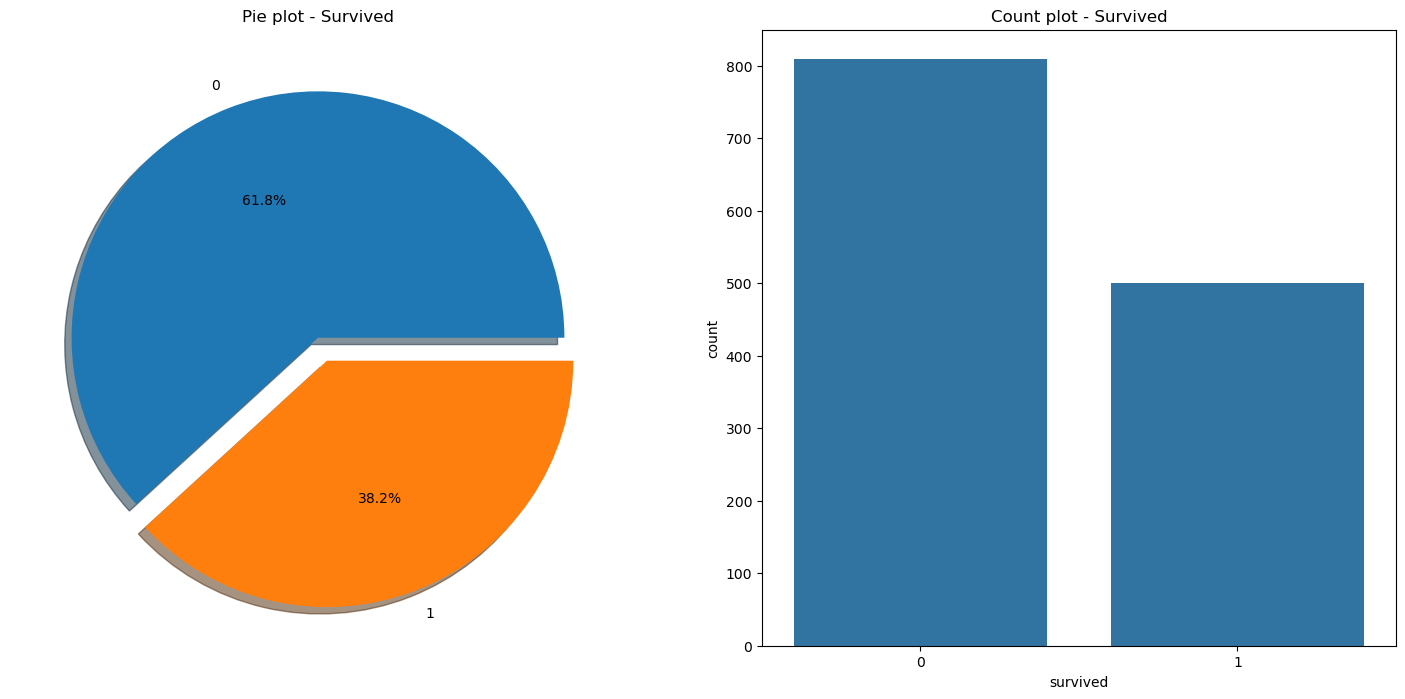

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic['survived'].value_counts().plot.pie(explode=[0, 0.1],
                                            autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

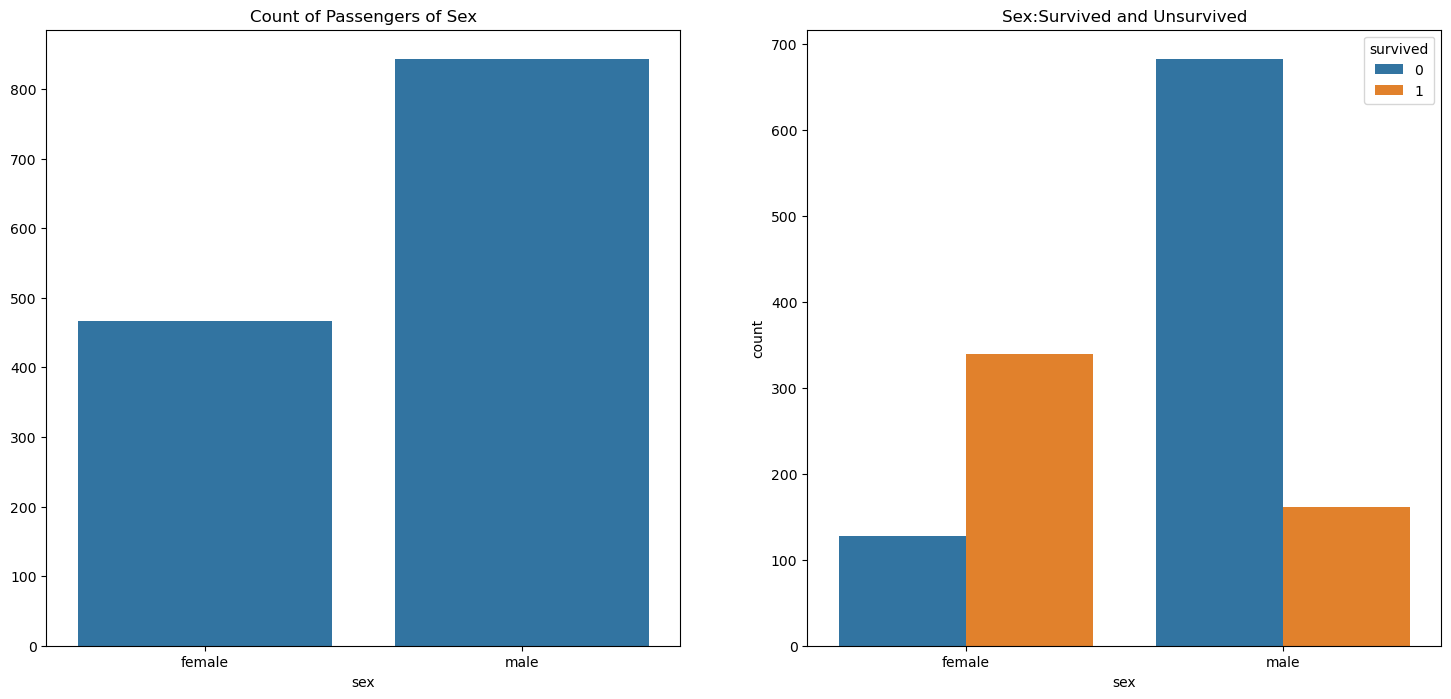

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(x='sex', data=titanic, ax=ax[0])
ax[0].set_title('Count of Passengers of Sex')
ax[0].set_ylabel('')

sns.countplot(x='sex', hue='survived', data=titanic, ax=ax[1])
ax[1].set_title('Sex:Survived and Unsurvived')

plt.show()

In [9]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


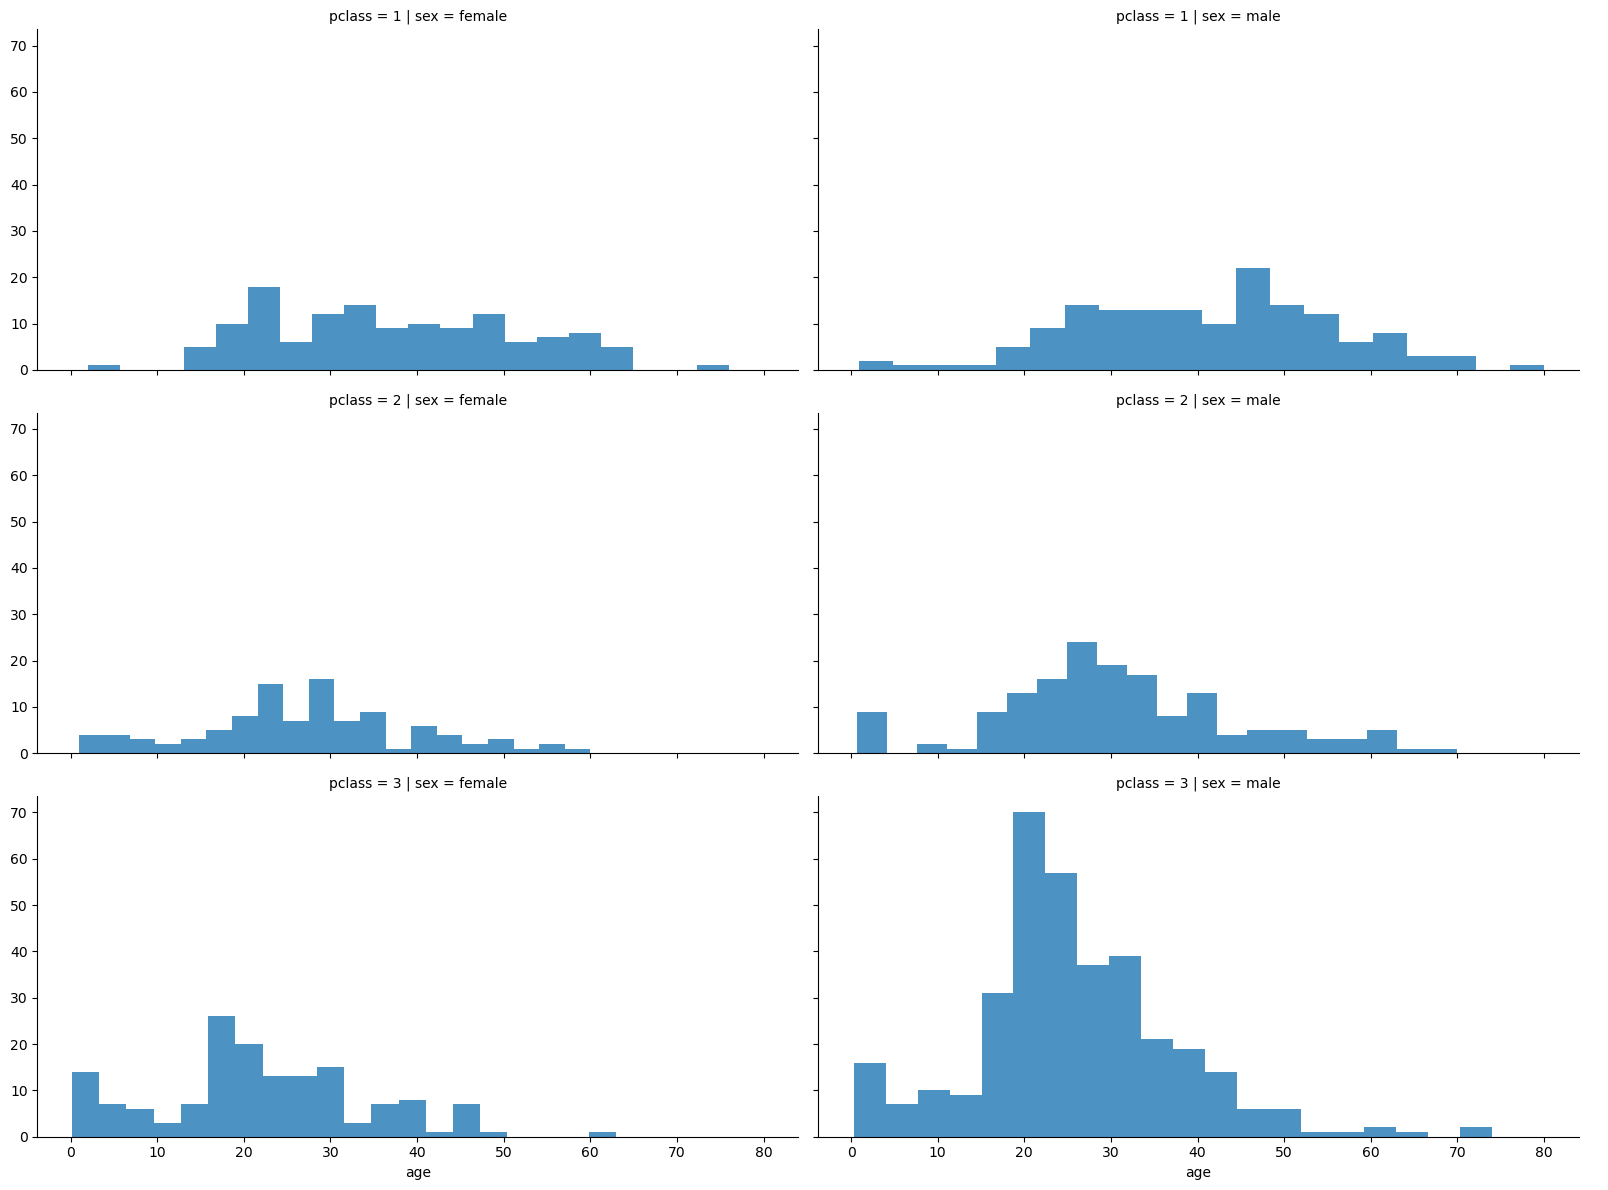

In [10]:
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=.8, bins=20)
grid.add_legend()

In [11]:
import plotly.express as px

fig = px.histogram(titanic, x="age")
fig.show()

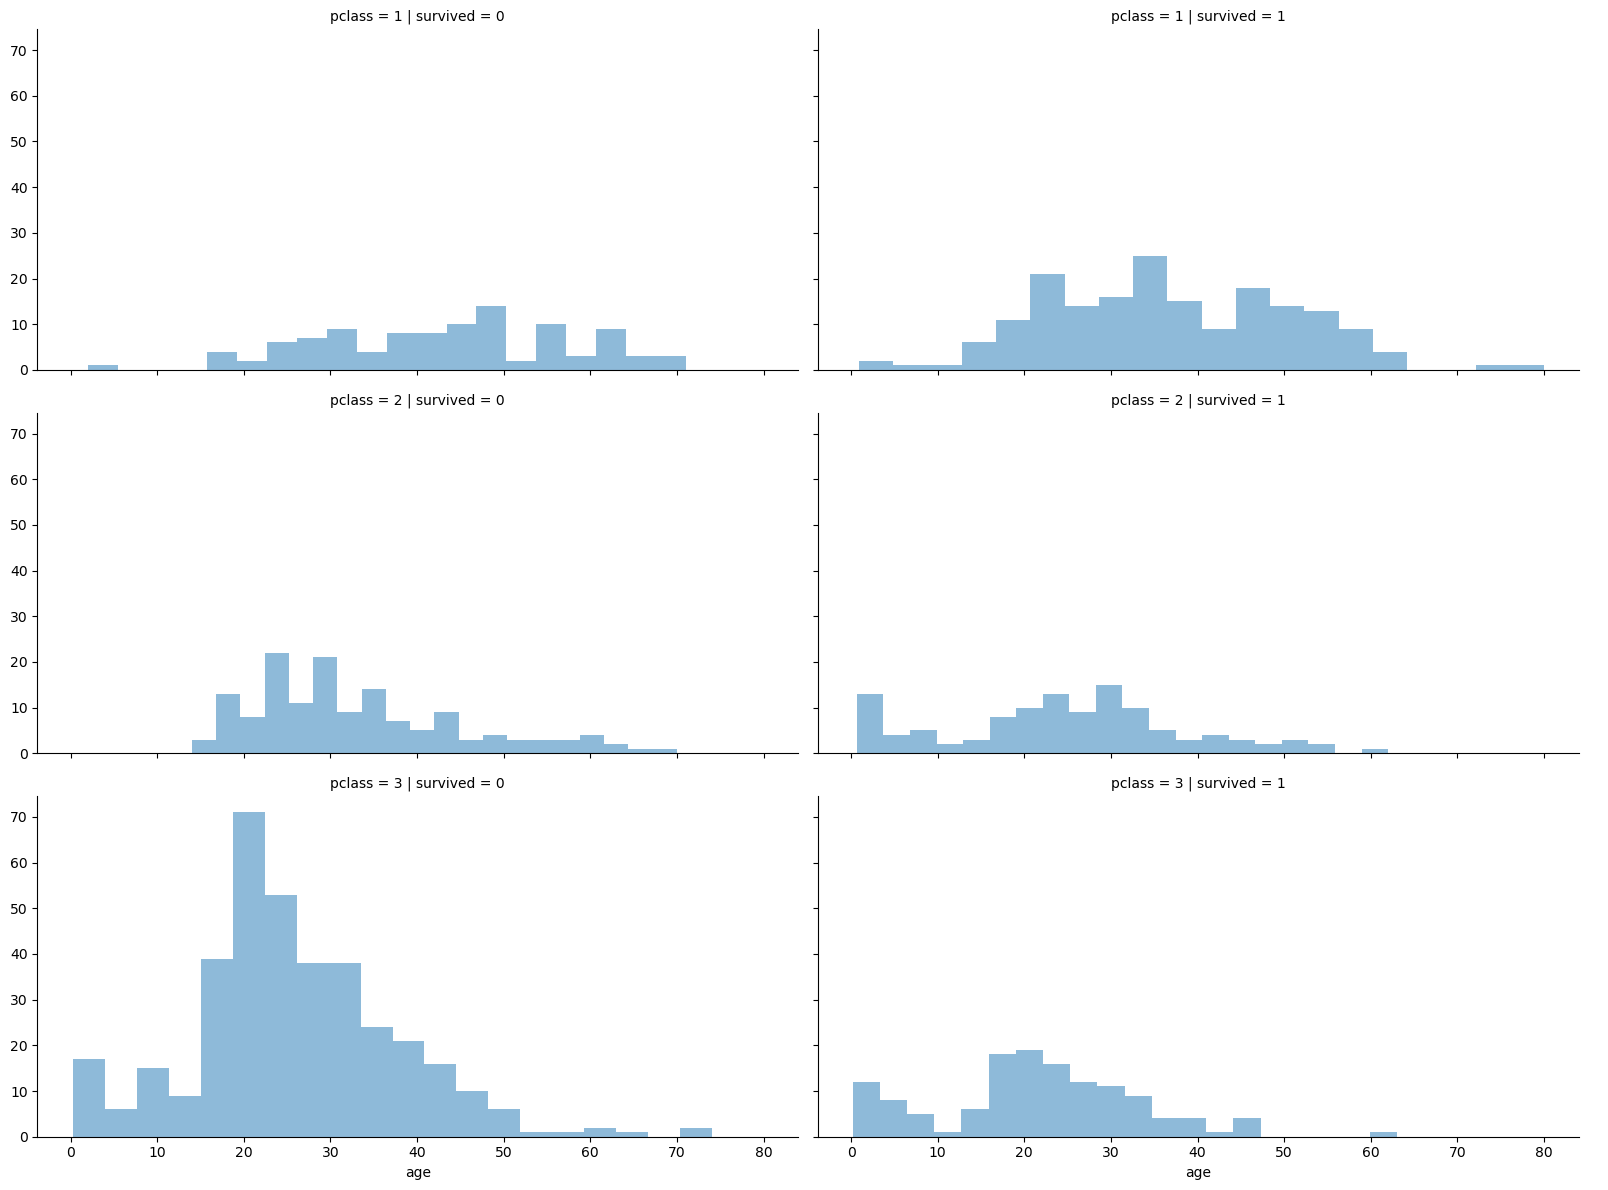

In [12]:
grid = sns.FacetGrid(titanic, col='survived', row='pclass', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

In [13]:
titanic['age_cat'] = pd.cut(titanic['age'], bins=[0,7,15,30,60,100],
                            include_lowest=True,
                            labels=['baby','teen','young','adult','old'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


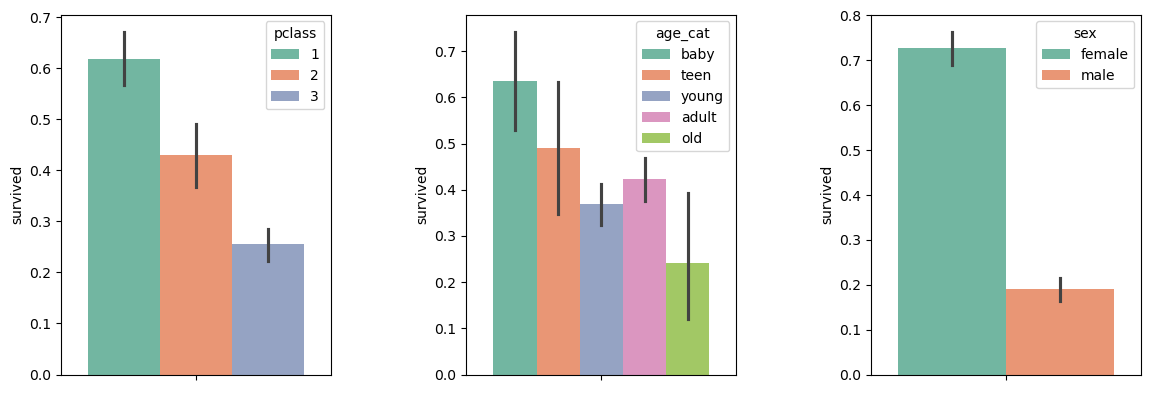

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(131)
sns.barplot(hue='pclass', y='survived', data=titanic, palette="Set2")
plt.subplot(132)
sns.barplot(hue='age_cat', y='survived', data=titanic, palette="Set2")
plt.subplot(133)
sns.barplot(hue='sex', y='survived', data=titanic, palette="Set2")
plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, hspace=0.5, wspace=0.5)

Text(0.5, 1.0, 'Male')

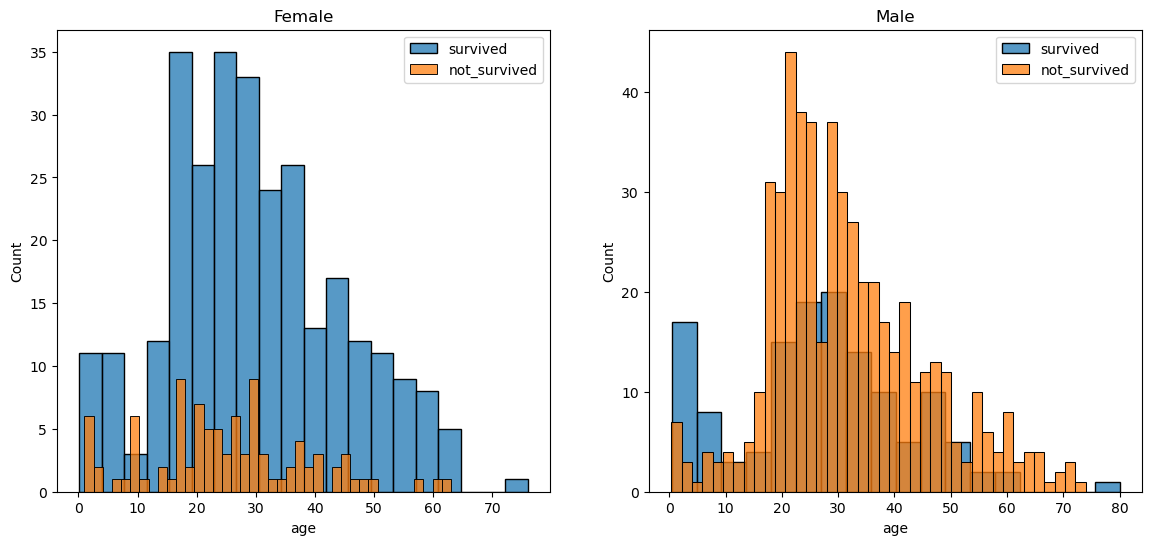

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']=='male']

ax = sns.histplot(women[women['survived']==1]['age'], bins=20,
                  label='survived', ax = axes[0], kde=False)
ax = sns.histplot(women[women['survived']==0]['age'], bins=40,
                  label='not_survived', ax = axes[0], kde=False)
ax.legend(); ax.set_title('Female')

ax = sns.histplot(men[men['survived']==1]['age'], bins=18,
                  label='survived', ax = axes[1], kde=False)
ax = sns.histplot(men[men['survived']==0]['age'], bins=40,
                  label='not_survived', ax = axes[1], kde=False)
ax.legend(); ax.set_title('Male')

In [21]:
for idx, dataset in titanic.iterrows():
    print(dataset['name'])

Allen, Miss. Elisabeth Walton
Allison, Master. Hudson Trevor
Allison, Miss. Helen Loraine
Allison, Mr. Hudson Joshua Creighton
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Anderson, Mr. Harry
Andrews, Miss. Kornelia Theodosia
Andrews, Mr. Thomas Jr
Appleton, Mrs. Edward Dale (Charlotte Lamson)
Artagaveytia, Mr. Ramon
Astor, Col. John Jacob
Astor, Mrs. John Jacob (Madeleine Talmadge Force)
Aubart, Mme. Leontine Pauline
Barber, Miss. Ellen "Nellie"
Barkworth, Mr. Algernon Henry Wilson
Baumann, Mr. John D
Baxter, Mr. Quigg Edmond
Baxter, Mrs. James (Helene DeLaudeniere Chaput)
Bazzani, Miss. Albina
Beattie, Mr. Thomson
Beckwith, Mr. Richard Leonard
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
Behr, Mr. Karl Howell
Bidois, Miss. Rosalie
Bird, Miss. Ellen
Birnbaum, Mr. Jakob
Bishop, Mr. Dickinson H
Bishop, Mrs. Dickinson H (Helen Walton)
Bissette, Miss. Amelia
Bjornstrom-Steffansson, Mr. Mauritz Hakan
Blackwell, Mr. Stephen Weart
Blank, Mr. Henry
Bonnell, Miss. Caroline
Bonnell, Miss

In [30]:
import re

title = []
for idx, dataset in titanic.iterrows():
    title.append(re.search('\,\s\w+(\s\w+)?\.', dataset['name']).group()[2:-1])

titanic['title'] = title
titanic.head()

<>:5: SyntaxWarning:

invalid escape sequence '\,'

<>:5: SyntaxWarning:

invalid escape sequence '\,'

/tmp/ipykernel_17411/3193759474.py:5: SyntaxWarning:

invalid escape sequence '\,'



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [31]:
pd.crosstab(titanic['title'], titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [32]:
titanic[titanic['title']=='Dr']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA",NaN,Dr
93,1,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S,13,NaN,"San Francisco, CA",adult,Dr
119,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,5,NaN,"New York, NY",adult,Dr
181,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,8,NaN,"New York, NY",adult,Dr
206,1,0,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,NaN,230.0,"Fond du Lac, WI",adult,Dr
278,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,3,NaN,"Basel, Switzerland",adult,Dr
508,2,0,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,NaN,NaN,"Frankfort, KY",adult,Dr
525,2,0,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,NaN,NaN,"Hamilton, ON",young,Dr


In [33]:
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')

Rare_f = ['Dona', 'Lady', 'the Countess']
Rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Master']

for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')

for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')

dr_m = [40, 93, 119, 206, 278, 508, 525]

for each in dr_m:
    titanic.loc['title', each] = titanic.loc['title', each].replace('Dr', 'Rare_m')

titanic['title'][181] = titanic['title'][181].replace('Dr', 'Rare_m')

/tmp/ipykernel_17411/480413216.py:17: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/tmp/ipykernel_17411/480413216.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

In [34]:
titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [35]:
titanic[['title','survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare_f,1.000000
4,Rare_m,0.448276


In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
dtypes: category(1), float64(3), int64(4), object(8)
memory usage: 155.0+ KB


In [37]:
titanic['sex'].unique()

array(['female', 'male'], dtype=object)

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0


In [39]:
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
 16  gender     1045 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(8)
memory usage: 140.0+ KB


<Axes: >

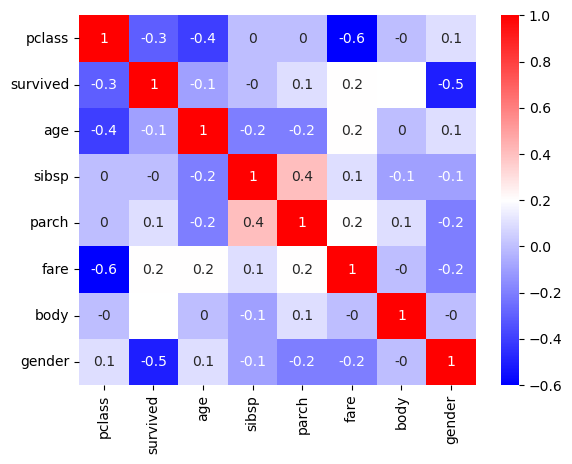

In [41]:
numeric_columns = titanic.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = titanic[numeric_columns].corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

In [42]:
from sklearn.model_selection import train_test_split

x = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
y = titanic['survived']

X_train, X_test, y_train, y_test = \
                    train_test_split(x, y, test_size=0.2, random_state=13)

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.7655502392344498


In [44]:
import numpy as np

dicaprio = np.array([[3, 18, 0, 0, 5, 1]])
print('Dicaprio : ', dt.predict_proba(dicaprio)[0,1])

Dicaprio :  0.16728624535315986


/home/kth/anaconda3/envs/eda_venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [45]:
winslet = np.array([[1, 16, 1, 1, 100, 0]])
print('Winslet : ', dt.predict_proba(winslet)[0,1])

Winslet :  1.0


/home/kth/anaconda3/envs/eda_venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

